<a href="https://colab.research.google.com/github/Willgnner-Santos/PublicTransportAI/blob/main/Atendimento_Preditivo_Demanda_Trasporte_P%C3%BAblico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anhanguera Axis Data Analysis

Demands for collective public transport in Goiânia along the Anhanguera Axis, based on historical data from previous years to support the advance reservation of convoys.

# CNN Model (Convolutional Neural Network 1D)

Anhanguera Axis Data Analysis
Demands for collective public transport in Goiânia along the Anhanguera Axis, based on historical data from previous years to support the advance reservation of convoys.

1D CNN Model (Convolutional Neural Network)
A 1D CNN is a type of Convolutional Neural Network specifically designed to process one-dimensional sequences. It includes a convolutional layer that operates over 1D input sequences. This is often followed by additional convolutional layers when dealing with long input sequences and a pooling layer, which distills the most salient features from the output of the convolutional layers.

The convolutional and pooling layers are typically followed by a dense, fully connected layer that interprets the features extracted by the convolutional part of the model. A flattening layer is used between the convolutional layers and the dense layer to reduce feature maps into a single one-dimensional vector.

We can define a 1D CNN model for univariate time series forecasting as follows:

- A one-dimensional CNN is a model of CNN that has a convolutional hidden layer that operates on a 1D sequence. This is followed by perhaps a second convolutional layer in some cases, such as very long input strings, and then a pool layer whose job is to distill the output from the convolutional layer to the most salient elements.

- The convolutional and pool layers are followed by a dense and fully connected layer that interprets the resources extracted by the convolutional part of the model. A flattened layer is used between the convolutional layers and the dense layer to reduce the resource maps to a single one-dimensional vector.

- We can define a CNN 1D model for univariate time series forecasting as follows.


# Required Libraries.

In [ ]:
from random import randint
import random
import math

import numpy as np # linear algebra.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv).
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import os
print(os.listdir("../input/dadosbrutos")) # raw data is the dataset.



['demanda.csv']


# Codes

In [ ]:
data=pd.read_csv('../input/dadosbrutos//demanda.csv') # o arquivo demanda contém os embarques dos passageiros, de 2013-2016.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
25125    1460 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


[](http://)As we can see, the date is object and we have to convert date column to datetime. So we are going to use to_datetime function for the convert.

In [ ]:
data.head()

,25125
0,105630
1,110150
2,110242
3,71226
4,35261


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
25125    1460 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


We are going to convert hourly data to daily data.

In [ ]:
df=pd.DataFrame(data)

<Figure size 1152x576 with 0 Axes>

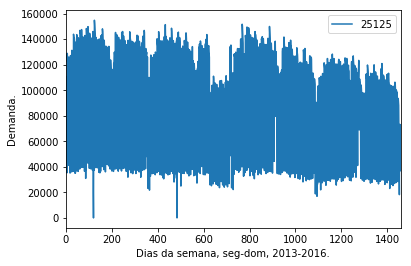

In [ ]:
plt.figure(figsize=(16,8))
data.plot()
plt.xlabel('Dias da semana, seg-dom, 2013-2016.')
plt.ylabel('Demanda.')
plt.show()

In [ ]:
df_1=df.values
df_1=df_1.astype('float32')

scaler = MinMaxScaler(feature_range=(0,1))
ts = scaler.fit_transform(df_1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
25125    1460 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


In [ ]:
timestep = 30

X=[]
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 1400
Xtrain = X[:k,:,:]
Ytrain = Y[:k]

In [ ]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model.
model.fit(Xtrain, Ytrain, epochs=200, verbose=0)

In [ ]:
Xtest = X[k:,:,:]
Ytest= Y[k:]

In [ ]:
preds = model.predict(Xtest)
preds = scaler.inverse_transform(preds)

Ytest=np.asanyarray(Ytest)
Ytest=Ytest.reshape(-1,1)
Ytest = scaler.inverse_transform(Ytest)

Ytrain=np.asanyarray(Ytrain)
Ytrain=Ytrain.reshape(-1,1)
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

111511160.0

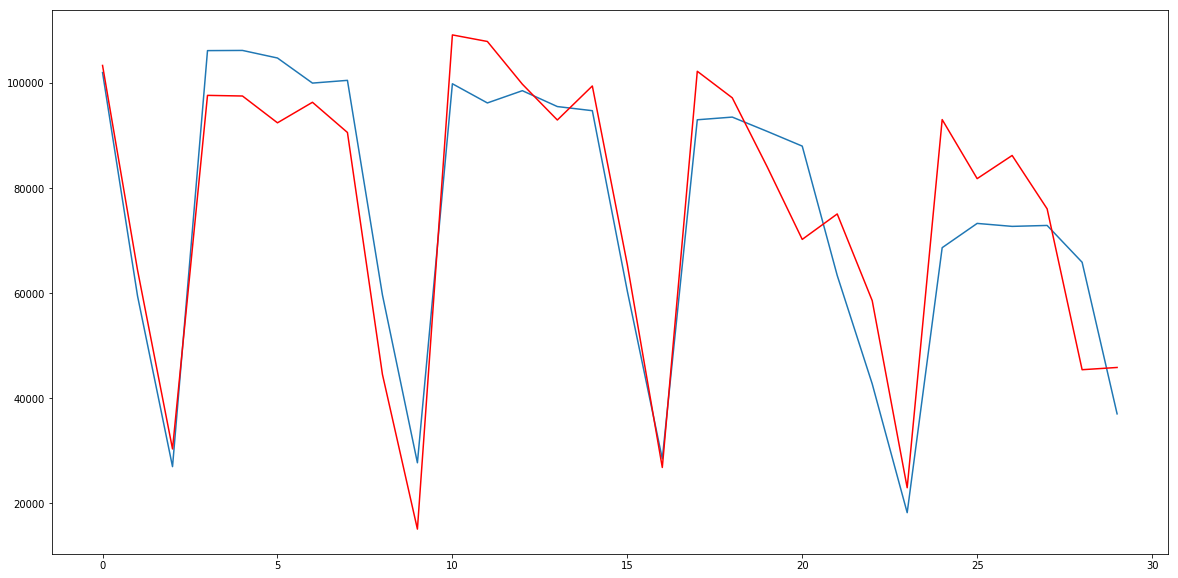

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest)
pyplot.plot(preds, 'r')
pyplot.show()